**Importing Libraries**

In [19]:
 #Importing necessary libraries
import pandas as pd
import sqlite3, ipywidgets
import matplotlib.pyplot as plt

# Creating a  db Connection
con = sqlite3.connect("/content/drive/MyDrive/beegeez_sales_data_sqlite3 2 (1).db")

# Creating cursor
cur = con.cursor()

**Check Table names**

In [20]:
cur.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cur.fetchall())

[('sales',)]


**Check columns of the Sales table**





In [4]:
def table_columns(db, table_name):
    cur = db.cursor()
    sql = "select * from %s where 1=0;" % table_name
    cur.execute(sql)
    return [d[0] for d in cur.description]
   

In [5]:
table_columns(con, 'sales')

['Region',
 'Country',
 'Item_Type',
 'Sales_Channel',
 'Order_Priority',
 'Order_Date',
 'Order_ID',
 'Ship_Date',
 'Units_Sold',
 'Unit_Price',
 'Unit_Cost',
 'Total_Revenue',
 'Total_Cost',
 'Total_Profit']

**Getting details of a sales table**

In [6]:
cur.execute("PRAGMA table_info(sales)")
result = cur.fetchall()

for row in result:
    print(row)

(0, 'Region', 'TEXT', 0, None, 0)
(1, 'Country', 'TEXT', 0, None, 0)
(2, 'Item_Type', 'TEXT', 0, None, 0)
(3, 'Sales_Channel', 'TEXT', 0, None, 0)
(4, 'Order_Priority', 'TEXT', 0, None, 0)
(5, 'Order_Date', 'DATE', 0, None, 0)
(6, 'Order_ID', 'INTEGER', 0, None, 0)
(7, 'Ship_Date', 'DATE', 0, None, 0)
(8, 'Units_Sold', 'INTEGER', 0, None, 0)
(9, 'Unit_Price', 'REAL', 0, None, 0)
(10, 'Unit_Cost', 'REAL', 0, None, 0)
(11, 'Total_Revenue', 'REAL', 0, None, 0)
(12, 'Total_Cost', 'REAL', 0, None, 0)
(13, 'Total_Profit', 'REAL', 0, None, 0)


**Viewing Data in sales table**

In [7]:
sales='''
SELECT * from sales;
'''
# Load the data into a DataFrame
users_df = pd.read_sql_query(sales, con)
users_df


,Region,Country,Item_Type,Sales_Channel,Order_Priority,Order_Date,Order_ID,Ship_Date,Units_Sold,Unit_Price,Unit_Cost,Total_Revenue,Total_Cost,Total_Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,2014-07-05,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2013-02-06,5062,651.21,524.96,3296425.02,2657347.52,639077.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Sub-Saharan Africa,Mali,Clothes,Online,M,2011-07-26,512878119,2011-09-03,888,109.28,35.84,97040.64,31825.92,65214.72
96,Asia,Malaysia,Fruits,Offline,L,2011-11-11,810711038,2011-12-28,6267,9.33,6.92,58471.11,43367.64,15103.47
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,2016-06-01,728815257,2016-06-29,1485,154.06,90.93,228779.10,135031.05,93748.05
98,North America,Mexico,Personal Care,Offline,M,2015-07-30,559427106,2015-08-08,5767,81.73,56.67,471336.91,326815.89,144521.02


**Checking null values**

In [8]:
cur.execute("SELECT * FROM sales")
rows = cur.fetchall()

for row in rows:
    for col in row:
        if col is None:
            print("Null value found:", row)
            


**Group A.1**

**Total revenue and total profit over time**



In [9]:
df = pd.read_sql_query(
    """SELECT strftime('%Y', Ship_Date) as year, 
    SUM(Total_Revenue) as Revenue, SUM(Total_Profit) as Profit FROM sales
    GROUP BY year""", con)

print(df)


   year      Revenue      Profit
0  2010  16604238.53  5987980.15
1  2011  11459719.49  2946149.26
2  2012  34149877.49  9649456.37
3  2013  20156772.41  6662167.54
4  2014  16803890.68  5932714.18
5  2015  12427982.86  3996539.44
6  2016  12372867.22  4903838.01
7  2017  13373419.63  4089353.45


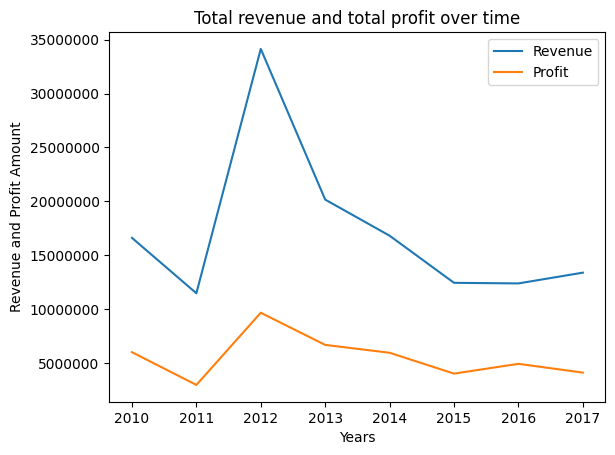

In [10]:
df.set_index('year', inplace=True)
df.plot(kind='line')

plt.title('Total revenue and total profit over time')
plt.xlabel('Years')
plt.ylabel('Revenue and Profit Amount')
plt.ticklabel_format(axis='y', style='plain')
plt.show()

**Group A.3**
**Total revenue and profit generated by Region**

In [11]:
# Total revenue and profit generated by Region
df = pd.read_sql_query(
      """SELECT Region as Region, SUM(Total_Revenue) as Revenue FROM sales
      GROUP BY Region""", con)

print(df)

                              Region      Revenue
0                               Asia  21347091.02
1              Australia and Oceania  14094265.13
2  Central America and the Caribbean   9170385.49
3                             Europe  33368932.11
4       Middle East and North Africa  14052706.58
5                      North America   5643356.55
6                 Sub-Saharan Africa  39672031.43


Text(0.5, 1.0, 'Total Revenue by Region')

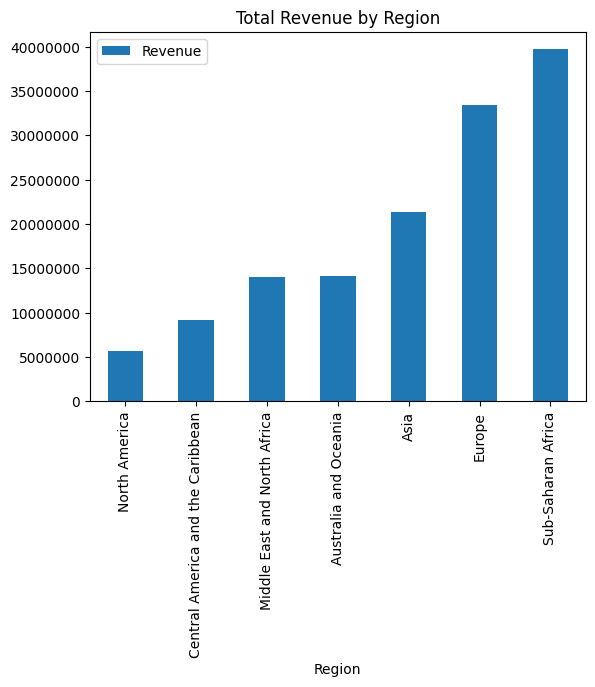

In [12]:
df = df.sort_values('Revenue', ascending=True)
df.set_index('Region', inplace=True)
bar = df.plot.bar()
bar.ticklabel_format(axis='y', style='plain')
bar.set_title('Total Revenue by Region')




In [13]:
df = pd.read_sql_query(
      """SELECT Region as Region, SUM(Total_Profit) as Profit FROM sales
      GROUP BY Region""", con)
print(df)

                              Region       Profit
0                               Asia   6113845.87
1              Australia and Oceania   4722160.03
2  Central America and the Caribbean   2846907.85
3                             Europe  11082938.63
4       Middle East and North Africa   5761191.86
5                      North America   1457942.76
6                 Sub-Saharan Africa  12183211.40


Text(0.5, 1.0, 'Total Profit by Region')

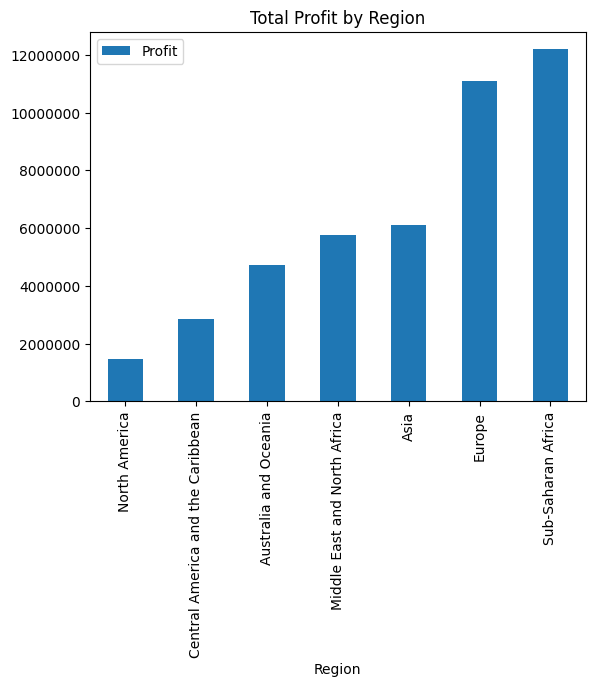

In [14]:
df = df.sort_values('Profit', ascending=True)
df.set_index('Region', inplace=True)
bar = df.plot.bar()
bar.ticklabel_format(axis='y', style='plain')
bar.set_title('Total Profit by Region')

**Group B.3**

**Identifying Top Revenue-Generating Products by Item Type and Sales Channel**

In [15]:
df = pd.read_sql_query("SELECT * FROM sales", con)

# Filter the data for the "online" sales channel
online_data = df[df['Sales_Channel'] == 'Online']

grouped = online_data.groupby('Item_Type').agg({'Total_Revenue': 'sum'})
print(grouped)




                 Total_Revenue
Item_Type                     
Baby Food           4198590.16
Beverages            717444.00
Cereal              4549261.20
Clothes             3320909.92
Cosmetics          18348846.80
Fruits               336757.02
Household            188452.14
Meat                4503675.75
Office Supplies    17040863.28
Personal Care        683099.34
Snacks              2080733.46
Vegetables          2285326.04


<ipython-input-16-4382ac84f212>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:.0f}'.format(x/1) for x in ax.get_xticks()])


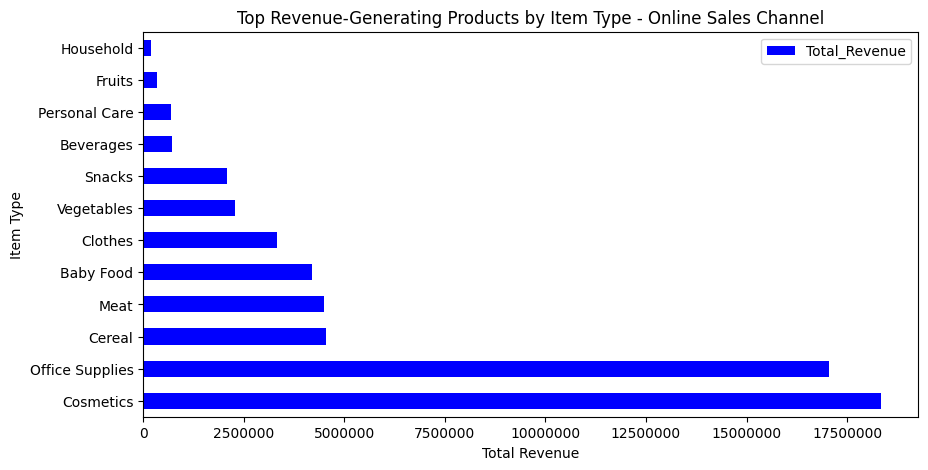

In [16]:
grouped = grouped.sort_values('Total_Revenue', ascending=False)

ax = grouped.plot.barh(color='blue', figsize=(10, 5))

plt.title('Top Revenue-Generating Products by Item Type - Online Sales Channel')
plt.xlabel('Total Revenue')
plt.ylabel('Item Type')
ax.set_xticklabels(['{:.0f}'.format(x/1) for x in ax.get_xticks()])
plt.show()

In [17]:
df = pd.read_sql_query("SELECT * FROM sales", con)

# Filter the data for the "offline sales channel
online_data = df[df['Sales_Channel'] == 'Offline']

grouped = online_data.groupby('Item_Type').agg({'Total_Revenue': 'sum'})

print(grouped)



                 Total_Revenue
Item_Type                     
Baby Food           6151737.44
Beverages           1973350.60
Cereal               773637.70
Clothes             4466382.88
Cosmetics          18252662.80
Fruits               129724.32
Household          29701260.15
Office Supplies    13544516.79
Personal Care       3297805.50
Vegetables           803731.02


<ipython-input-18-9199ef8bc9e6>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:.0f}'.format(x/1) for x in ax.get_xticks()])


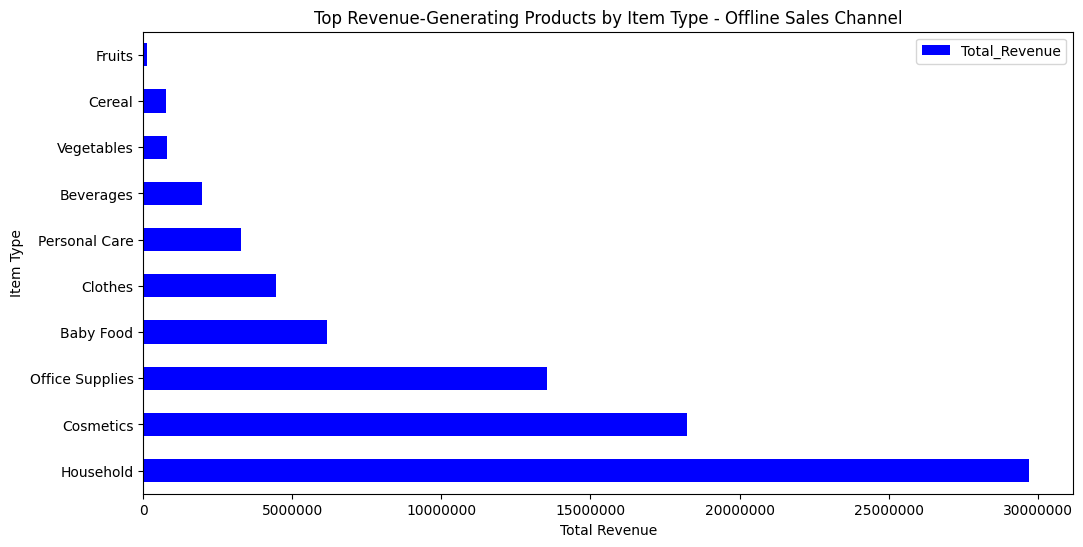

In [18]:
grouped = grouped.sort_values('Total_Revenue', ascending=False)

# Plot the horizontal bar chart
ax = grouped.plot.barh(color='blue', figsize=(12, 6))
plt.title('Top Revenue-Generating Products by Item Type - Offline Sales Channel')
plt.xlabel('Total Revenue')
plt.ylabel('Item Type')

ax.set_xticklabels(['{:.0f}'.format(x/1) for x in ax.get_xticks()])

plt.show()
